# Instalación de dependencias

Esta celda instala las librerías necesarias para trabajar con YOLOv8 y procesamiento de imágenes en Python. Se utilizan `ultralytics` para acceder al modelo YOLO, `opencv-python` y `pillow` para la manipulación de imágenes, y `matplotlib` para visualización de gráficos y resultados.

In [1]:
# Instalación de dependencias
%pip install ultralytics opencv-python pillow matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.0 MB/s eta 0:00:00


# Importar librerías

Esta celda importa todas las librerías necesarias para el proyecto de clasificación de imágenes con YOLO en Python:

- ultralytics.YOLO: Permite trabajar con modelos YOLOv8 para tareas de clasificación y detección.

- os, urllib.request, zipfile, pathlib.Path, shutil: Utilidades de Python para manejo de archivos, carpetas, descargas y descompresión, útiles si se requiere organizar datasets o mover archivos.

- matplotlib.pyplot: Herramienta de visualización de gráficos para mostrar imágenes y resultados.

- PIL.Image: Biblioteca para abrir, manipular y mostrar imágenes.

- numpy: Paquete fundamental para operaciones matemáticas y manejo de arreglos.

In [ ]:
# Importar la clase YOLO de ultralytics para modelos de clasificación y detección
from ultralytics import YOLO

# Librerías estándar de Python para manejo de archivos, descargas, rutas y descompresión
import os
import urllib.request
import zipfile
from pathlib import Path
import shutil

# Matplotlib para visualización de imágenes y gráficos
import matplotlib.pyplot as plt

# Pillow para cargar y manipular imágenes
from PIL import Image

# Numpy para operaciones numéricas y de arreglos
import numpy as np


# Crear estructura de directorios

Esta celda define y ejecuta una función para crear la estructura básica de carpetas que utilizará el dataset. Se generan dos directorios principales: uno para los datos de entrenamiento (`train`) y otro para los de validación (`val`), ambos dentro de la carpeta `dataset`. Esto facilita la organización y acceso a las imágenes durante el entrenamiento y la evaluación del modelo

In [35]:
# Definir función para crear la estructura de carpetas del dataset
def crear_estructura():
    """Crea la estructura de directorios para el dataset (entrenamiento y validación)."""
    # Crear la carpeta para imágenes de entrenamiento
    Path("dataset/train").mkdir(parents=True, exist_ok=True)
    # Crear la carpeta para imágenes de validación
    Path("dataset/val").mkdir(parents=True, exist_ok=True)
    print("✓ Estructura de directorios creada")

# Ejecutar la función para asegurar que la estructura esté lista
crear_estructura()


✓ Estructura de directorios creada


# Descargar y preparar el dataset (CIFAR-10)

Esta celda utiliza la librería `torchvision` para descargar automáticamente el dataset CIFAR-10, que es ampliamente usado en tareas de visión por computadora. El dataset contiene 60,000 imágenes de 10 clases diferentes. También define las clases y selecciona todas las categorías para incluirlas en el procesamiento. Finalmente, imprime información básica sobre el número de imágenes descargadas y las clases seleccionadas.

In [36]:
# Importar utilidades de torchvision para descargar y procesar datasets
import torchvision
from torchvision import datasets, transforms

# Definir una transformación: redimensionar imágenes a 640x640 y convertirlas a tensor
transform = transforms.Compose([
    transforms.Resize((640, 640)),
    transforms.ToTensor()
])

# Descargar el dataset CIFAR-10 para entrenamiento y validación (descarga automática)
trainset = datasets.CIFAR10(root='./data', train=True, download=True)
testset = datasets.CIFAR10(root='./data', train=False, download=True)

# Definir las clases presentes en CIFAR-10
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# Seleccionar todas las clases para procesamiento y convertir a índices
selected_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                    'dog', 'frog', 'horse', 'ship', 'truck']
selected_indices = [classes.index(c) for c in selected_classes]

# Imprimir cantidad de imágenes y clases seleccionadas
print(f"Dataset descargado: {len(trainset)} imágenes de entrenamiento")
print(f"Clases seleccionadas: {selected_classes}")


Dataset descargado: 50000 imágenes de entrenamiento
Clases seleccionadas: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Organizar imágenes en estructura YOLO

Esta celda define una función para organizar las imágenes descargadas en la estructura de carpetas requerida por YOLO para clasificación. Agrupa las imágenes por clase en las carpetas de `train` y `val`, facilitando que el modelo YOLO las procese correctamente. La función permite establecer un límite de imágenes por clase, aunque aquí se usa todo el dataset (sin límite).

In [39]:
# Función para organizar las imágenes en carpetas por clase según estructura YOLO (clasificación)
def preparar_dataset(dataset, split='train', max_per_class=None):
    """Organiza imágenes en estructura de carpetas por clase"""
    # Contador de imágenes por clase
    count = {idx: 0 for idx in selected_indices}

    # Recorrer el dataset y guardar imágenes en la carpeta correspondiente a su clase
    for i, (img, label) in enumerate(dataset):
        if label in selected_indices:
            # Si no se establece un máximo, usa todas las imágenes
            if max_per_class is None or count[label] < max_per_class:
                class_name = classes[label]
                class_dir = Path(f"dataset/{split}/{class_name}")
                class_dir.mkdir(parents=True, exist_ok=True)

                img_path = class_dir / f"{count[label]:04d}.jpg"
                img.save(img_path)
                count[label] += 1

    print(f"✓ {split.capitalize()} set preparado:")
    for idx in selected_indices:
        print(f"  - {classes[idx]}: {count[idx]} imágenes")
    print(f"Total de imágenes en {split}: {sum(count.values())}")
    return count

# Usar TODAS las imágenes disponibles para entrenamiento y validación
train_count = preparar_dataset(trainset, 'train', max_per_class=None)
val_count = preparar_dataset(testset, 'val', max_per_class=None)


✓ Train set preparado:
  - airplane: 5000 imágenes
  - automobile: 5000 imágenes
  - bird: 5000 imágenes
  - cat: 5000 imágenes
  - deer: 5000 imágenes
  - dog: 5000 imágenes
  - frog: 5000 imágenes
  - horse: 5000 imágenes
  - ship: 5000 imágenes
  - truck: 5000 imágenes
Total de imágenes en train: 50000
✓ Val set preparado:
  - airplane: 1000 imágenes
  - automobile: 1000 imágenes
  - bird: 1000 imágenes
  - cat: 1000 imágenes
  - deer: 1000 imágenes
  - dog: 1000 imágenes
  - frog: 1000 imágenes
  - horse: 1000 imágenes
  - ship: 1000 imágenes
  - truck: 1000 imágenes
Total de imágenes en val: 10000


# Visualizar algunas imágenes del dataset

Esta celda define una función que permite visualizar ejemplos de imágenes del conjunto de datos de entrenamiento. Muestra una cuadrícula horizontal donde cada imagen pertenece a una de las clases seleccionadas. El control de índices asegura que no se exceda el número de subplots definidos, evitando errores y manteniendo la visualización ordenada.

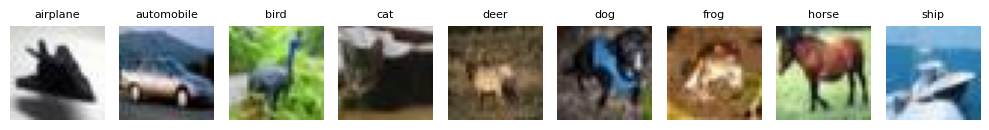

In [ ]:
# Función para visualizar ejemplos de imágenes del dataset, mostrando hasta num_images en una sola fila
def visualizar_dataset(num_images=9):
    filas = 1
    columnas = 9
    fig, axes = plt.subplots(filas, columnas, figsize=(10, 10))  # Fila única para todas las imágenes
    axes = axes.flatten()

    img_count = 0
    for class_name in selected_classes:
        class_path = Path(f"dataset/train/{class_name}")
        # Selecciona solo las imágenes necesarias por clase
        images = list(class_path.glob("*.jpg"))[:num_images // len(selected_classes) or 1]

        for img_path in images:
            if img_count >= len(axes): 
                break
            img = Image.open(img_path)
            axes[img_count].imshow(img)
            axes[img_count].set_title(class_name, fontsize=8)
            axes[img_count].axis('off')
            img_count += 1

        if img_count >= len(axes):
            break  # Rompe el ciclo externo si ya llenó la cuadrícula

    plt.tight_layout()
    plt.show()

# Ejecutar función para mostrar las imágenes
visualizar_dataset()


# Cargar modelo pre-entrenado YOLO para clasificación

Esta celda carga el modelo YOLOv8 pre-entrenado en su versión "nano" específica para tareas de clasificación de imágenes (`yolov8n-cls.pt`). Este modelo es ligero y óptimo para experimentos rápidos y recursos limitados. Imprime un mensaje indicando que la carga fue exitosa.

In [ ]:
# Cargar el modelo YOLOv8 "nano" pre-entrenado para clasificación de imágenes
model = YOLO('yolov8n-cls.pt')  # Modelo nano de clasificación, ideal para pruebas rápidas

# Confirmar que el modelo ha sido cargado correctamente
print("✓ Modelo YOLOv8 cargado")


✓ Modelo YOLOv8 cargado


# Entrenar el modelo

Esta celda entrena el modelo YOLOv8 nano pre-cargado usando el dataset preparado. Se especifican distintos hiperparámetros para mejorar el desempeño: número de épocas, tamaño de imagen, batch size, paciencia para "early stopping", optimizador, learning rate y uso de aumentación de datos. Se solicita guardar los resultados, generar gráficas y mostrar mensajes detallados. El entrenamiento se realiza en GPU si está disponible y, al finalizar, se imprime confirmación de que el proceso fue exitoso.

In [ ]:
# Entrenar el modelo YOLOv8 con el dataset preparado, ajustando hiperparámetros para mejor desempeño
results = model.train(
    data='dataset',          # Ruta a la carpeta con la estructura de datos clasificados
    epochs=20,               # Número de épocas de entrenamiento
    imgsz=128,               # Tamaño de las imágenes (mayor que el original para mejores resultados)
    batch=32,                # Tamaño del lote/batch (optimal para GPU)
    patience=10,             # Paciencia (early stopping) para evitar sobreajuste
    optimizer='AdamW',       # Se utiliza el optimizador AdamW para mejor convergencia
    lr0=0.001,               # Learning rate inicial
    lrf=0.01,                # Learning rate final
    augment=True,            # Usa data augmentation para mejorar robustez del aprendizaje
    save=True,               # Guarda checkpoints de entrenamiento
    plots=True,              # Genera y guarda gráficas de entrenamiento
    verbose=True,            # Muestra mensajes detallados durante el proceso
    device=0                 # Usa GPU (0) si está disponible, 'cpu' en caso contrario
)

# Imprimir confirmación del entrenamiento completado
print("✓ Entrenamiento completado")


Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=128, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretrained=Tru

# Monitorear métricas del entrenamiento

Esta celda permite visualizar los resultados más relevantes del entrenamiento leyendo el archivo de métricas generado por YOLOv8 (`results.csv`). Extrae y muestra la mejor precisión ("accuracy") lograda en validación y la época en la que se alcanzó ese valor, facilitando el análisis del aprendizaje y la toma de decisiones sobre hiperparámetros o selección de modelo final.

In [40]:
# Importar pandas para manejo y análisis de datos tabulares (CSV)
import pandas as pd

# Leer el archivo CSV con resultados del entrenamiento
results_csv = 'runs/classify/train/results.csv'
if os.path.exists(results_csv):
    # Cargar el archivo CSV
    df = pd.read_csv(results_csv)
    # Limpiar espacios extra en los nombres de columnas
    df = df.rename(columns=lambda x: x.strip())

    # Calcular y mostrar la mejor precisión en validación
    print(f"Mejor accuracy en validación: {df['metrics/accuracy_top1'].max():.4f}")
    # Mostrar la época (número) donde se logró la mejor precisión
    print(f"Época con mejor resultado: {df['metrics/accuracy_top1'].idxmax() + 1}")


Mejor accuracy en validación: 0.9105
Época con mejor resultado: 20


# Evaluar el modelo

Esta celda evalúa el modelo previamente entrenado utilizando el conjunto de validación. Al ejecutar `model.val()`, se calcula la precisión "top-1" (qué porcentaje de las predicciones coincide exactamente con la clase correcta) y "top-5" (la clase verdadera está entre las cinco predicciones más probables). Se imprimen ambas métricas, facilitando la comparación de desempeño y diagnóstico del modelo.

In [ ]:
# Evaluar el modelo YOLOv8 sobre el conjunto de validación y mostrar métricas clave
metrics = model.val()

# Imprimir la precisión de la mejor predicción (top-1 accuracy)
print(f"Accuracy: {metrics.top1:.4f}")

# Imprimir la precisión para el caso en que la clase correcta esté entre las 5 principales (top-5 accuracy)
print(f"Top5 Accuracy: {metrics.top5:.4f}")


Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/train... found 50000 images in 10 classes ✅ 
val: /content/dataset/val... found 10000 images in 10 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 40.2±15.3 MB/s, size: 0.9 KB)
val: Scanning /content/dataset/val... 10000 images, 0 corrupt: 100% ━━━━━━━━━━━━ 10000/10000 22.8Mit/s 0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 625/625 60.9it/s 10.3s
                   all       0.91      0.997
Speed: 0.0ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/runs/classify/val
Accuracy: 0.9105
Top5 Accuracy: 0.9974


# Realizar predicciones en imágenes de validación

Esta celda define una función para mostrar visualmente ejemplos de predicciones del modelo sobre imágenes del conjunto de validación. Muestra cada imagen junto con la clase real, la clase predicha por el modelo, y el nivel de confianza de la predicción. El diseño es robusto, controlando que no se presenten más imágenes que subplots disponibles, evitando errores de índice.

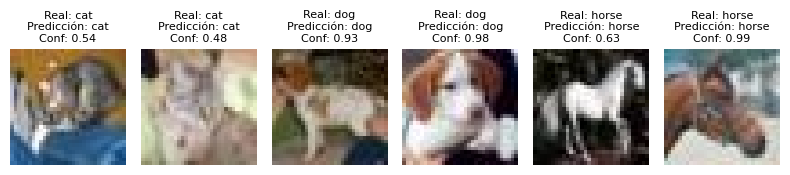

In [ ]:
# Función para mostrar predicciones del modelo en imágenes del conjunto de validación
def predecir_imagenes(num_images=6):
    """Realiza predicciones en imágenes del conjunto de validación y muestra imágenes más pequeñas (robusta a overflow)"""
    filas = 1
    columnas = 6

    # Definir la figura y los ejes (subplots) para visualizar las imágenes
    fig, axes = plt.subplots(filas, columnas, figsize=(8, 5))
    axes = axes.flatten()

    img_count = 0
    for class_name in selected_classes:
        class_path = Path(f"dataset/val/{class_name}")
        # Seleccionar un número limitado de imágenes por clase
        images = list(class_path.glob("*.jpg"))[:2]

        for img_path in images:
            if img_count >= len(axes):  # Previene el IndexError si hay más imágenes que subplots
                break

            # Realizar predicción sobre la imagen actual usando el modelo entrenado
            results = model.predict(str(img_path), verbose=False)
            img = Image.open(img_path)
            axes[img_count].imshow(img)

            # Extraer la clase predicha y el nivel de confianza desde los resultados
            pred_class = results[0].names[results[0].probs.top1]
            confidence = results[0].probs.top1conf.item()

            # Mostrar información de la predicción sobre la imagen
            axes[img_count].set_title(
                f"Real: {class_name}\nPredicción: {pred_class}\nConf: {confidence:.2f}",
                fontsize=8
            )
            axes[img_count].axis('off')
            img_count += 1

        if img_count >= len(axes):  # Salir del ciclo externo si ya se llenó la cuadrícula
            break

    plt.tight_layout()
    plt.show()

# Ejecuta la función para mostrar predicciones en imágenes de validación
predecir_imagenes()


# Exportar modelo entrenado

Esta celda permite exportar el modelo YOLOv8 entrenado a un formato interoperable como ONNX. Esto facilita el despliegue del modelo en distintos entornos, servidores, o aplicaciones externas que admiten este estándar. Al finalizar el proceso, se imprime una confirmación de éxito.

In [ ]:
# Exportar el modelo entrenado a formato ONNX para facilitad de uso en otras plataformas y frameworks
model.export(format='onnx')  # Exporta el modelo al formato Open Neural Network Exchange (ONNX)

# Imprimir mensaje de éxito al finalizar la exportación
print("✓ Modelo exportado exitosamente")

Ultralytics 8.3.225  Python-3.13.5 torch-2.8.0+cpu CPU (Intel Core i7-8665U 1.90GHz)

PyTorch: starting from 'C:\Users\cardo\01_Desarrollo\Proyectos_Personales\cifar10_with_yolo\runs\classify\train\weights\best.pt' with input shape (1, 3, 64, 64) BCHW and output shape(s) (1, 3) (2.8 MB)

ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.73...
ONNX: export success  0.7s, saved as 'C:\Users\cardo\01_Desarrollo\Proyectos_Personales\cifar10_with_yolo\runs\classify\train\weights\best.onnx' (5.5 MB)

Export complete (0.7s)
Results saved to C:\Users\cardo\01_Desarrollo\Proyectos_Personales\cifar10_with_yolo\runs\classify\train\weights
Predict:         yolo predict task=classify model=C:\Users\cardo\01_Desarrollo\Proyectos_Personales\cifar10_with_yolo\runs\classify\train\weights\best.onnx imgsz=64  
Validate:        yolo val task=classify model=C:\Users\cardo\01_Desarrollo\Proyectos_Personales\cifar10_with_yolo\runs\classify\train\weights\best.onnx imgsz=64 da

# Ver métricas de entrenamiento

Esta celda importa la funcionalidad para mostrar imágenes directamente en el notebook Jupyter usando IPython. Esto se utiliza para visualizar de manera sencilla archivos de imágenes como las gráficas de resultados (results.png) y la matriz de confusión generados durante el entrenamiento del modelo.

In [ ]:
# Importar clase IPImage de IPython para mostrar imágenes PNG directamente en la notebook
from IPython.display import Image as IPImage

# Mostrar gráficas de entrenamiento y matriz de confusión

Esta celda define una función que permite visualizar imágenes como las métricas de entrenamiento y la matriz de confusión. Usando Matplotlib y Pillow, la función garantiza que las imágenes se muestran en la notebook con mejor control visual, sin bordes ni ejes. Posteriormente, se muestran las gráficas generadas por YOLOv8, permitiendo un análisis más claro del desempeño durante el entrenamiento y la evaluación.

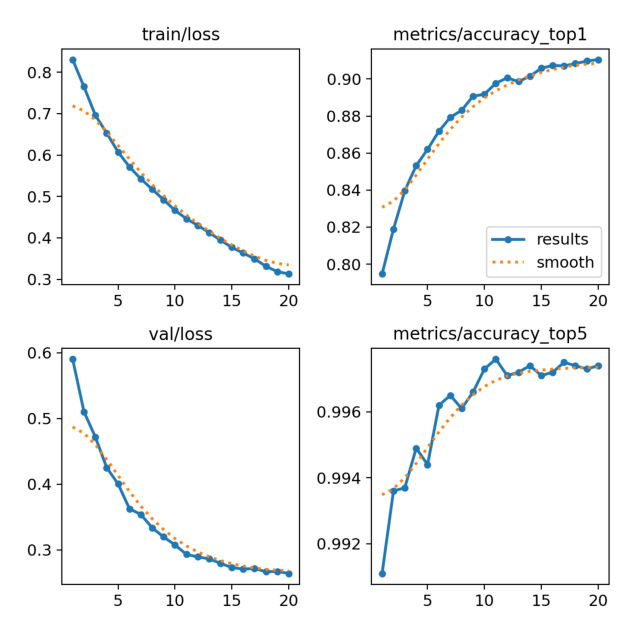

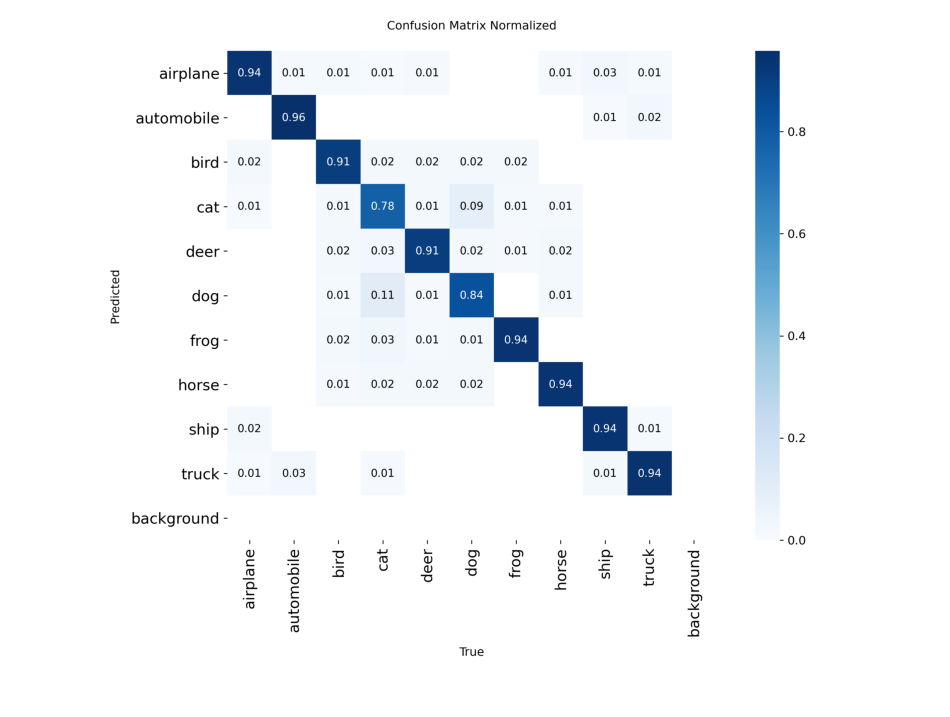

In [ ]:
# Importar librerías para mostrar imágenes y ajustar tamaño en la notebook
import matplotlib.pyplot as plt
from PIL import Image

# Definir ruta a los resultados de entrenamiento
results_path = Path('runs/classify/train')

# Definir función para mostrar imágenes
def mostrar_imagen(path_img, figsize=(8, 8)): 
    if path_img.exists():  # Verificar que el archivo existe antes de mostrar
        img = Image.open(path_img)
        plt.figure(figsize=figsize)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# Mostrar gráfica de resultados de entrenamiento con tamaño específico
mostrar_imagen(results_path / 'results.png', figsize=(8, 8))

# Mostrar matriz de confusión normalizada si existe, con tamaño más grande
mostrar_imagen(results_path / 'confusion_matrix_normalized.png', figsize=(12, 12))
